In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from keras.preprocessing import image

# **Here i used 3 models ->**

1. MobilenetV2 
2.InceptionV3 
3.Xception

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x -Y "/content/drive/MyDrive/SiPakMed.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/SiPakMed.rar

Creating    SiPakMed                                                  OK
Creating    SiPakMed/test                                             OK
Creating    SiPakMed/test/Dyskeratotic                                OK
Extracting  SiPakMed/test/Dyskeratotic/Dyskeratotic10.jpg                  0%  OK 
Extracting  SiPakMed/test/Dyskeratotic/Dyskeratotic100.jpg                 0%  OK 
Extracting  SiPakMed/test/Dyskeratotic/Dyskeratotic105.jpg                 0%  OK 
Extracting  SiPakMed/test/Dyskeratotic/Dyskeratotic106.jpg                 0%  OK 
Extracting  SiPakMed/test/Dyskeratotic/Dyskeratotic108.jpg                 0%  OK 
Extracting  SiPakMed/test/Dyskeratotic/Dyskeratotic109.jpg                 0%  OK 
Extracting  SiPakMed/test/Dyskeratotic/Dyskeratotic111.jpg                 0%  OK 
Extracting  SiP

In [ ]:
base_dir = "/content/SiPakMed"
train_dir = "/content/SiPakMed/train"
test_dir = "/content/SiPakMed/test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator( rescale = 1.0/255. )


In [ ]:
IMG_SIZE = 256 

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 16,
                                                    class_mode = 'categorical', 
                                                    target_size = (IMG_SIZE, IMG_SIZE))     
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size = 8,
                                                    class_mode = 'categorical', 
                                                    target_size = (IMG_SIZE, IMG_SIZE))

Found 3239 images belonging to 5 classes.
Found 810 images belonging to 5 classes.


In [ ]:
len(train_generator) , len(test_generator)

(203, 102)

In [ ]:
from collections import Counter

counter = Counter(train_generator.classes)

print(counter.items()) 

counter1 = Counter(test_generator.classes)

print(counter1.items())

dict_items([(0, 650), (1, 660), (2, 634), (3, 630), (4, 665)])
dict_items([(0, 163), (1, 165), (2, 159), (3, 157), (4, 166)])


In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# **MobileNetV2_model**

In [ ]:
MobileNetV2_model = tf.keras.applications.MobileNetV2( input_shape= IMG_SHAPE  , 
                                               include_top = False , 
                                                weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
MobileNetV2_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(MobileNetV2_model.output)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100,activation='relu')(x)
x = tf.keras.layers.Dense(5,activation='softmax')(x)

MobileNetV2 = Model(inputs=MobileNetV2_model.input, outputs=x)

In [ ]:
MobileNetV2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
MobileNetV2.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, decay=0.0001),
              metrics=['accuracy'])

In [ ]:
history_MobileNetV2 = MobileNetV2.fit(
      train_generator,
      validation_data= test_generator , 
      epochs= 100,
      )

Epoch 1/100
203/203 [==============================] - 96s 296ms/step - loss: 1.5443 - accuracy: 0.4224 - val_loss: 2.0225 - val_accuracy: 0.1988
Epoch 2/100
203/203 [==============================] - 59s 288ms/step - loss: 0.9086 - accuracy: 0.6712 - val_loss: 1.9441 - val_accuracy: 0.3062
Epoch 3/100
203/203 [==============================] - 58s 287ms/step - loss: 0.7525 - accuracy: 0.7283 - val_loss: 1.6895 - val_accuracy: 0.3531
Epoch 4/100
203/203 [==============================] - 58s 285ms/step - loss: 0.6340 - accuracy: 0.7688 - val_loss: 1.6511 - val_accuracy: 0.4025
Epoch 5/100
203/203 [==============================] - 60s 296ms/step - loss: 0.5689 - accuracy: 0.7907 - val_loss: 1.5940 - val_accuracy: 0.4086
Epoch 6/100
203/203 [==============================] - 59s 288ms/step - loss: 0.5300 - accuracy: 0.8067 - val_loss: 1.4066 - val_accuracy: 0.4654
Epoch 7/100
203/203 [==============================] - 58s 285ms/step - loss: 0.4974 - accuracy: 0.8185 - val_loss: 1.3024 -

In [ ]:
pwd 

'/content'

In [ ]:
cd /content/drive/MyDrive/SiPakMed/models

/content/drive/MyDrive/SiPakMed/models


In [ ]:
MobileNetV2.save("MobileNetV2.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
cd /content 

/content


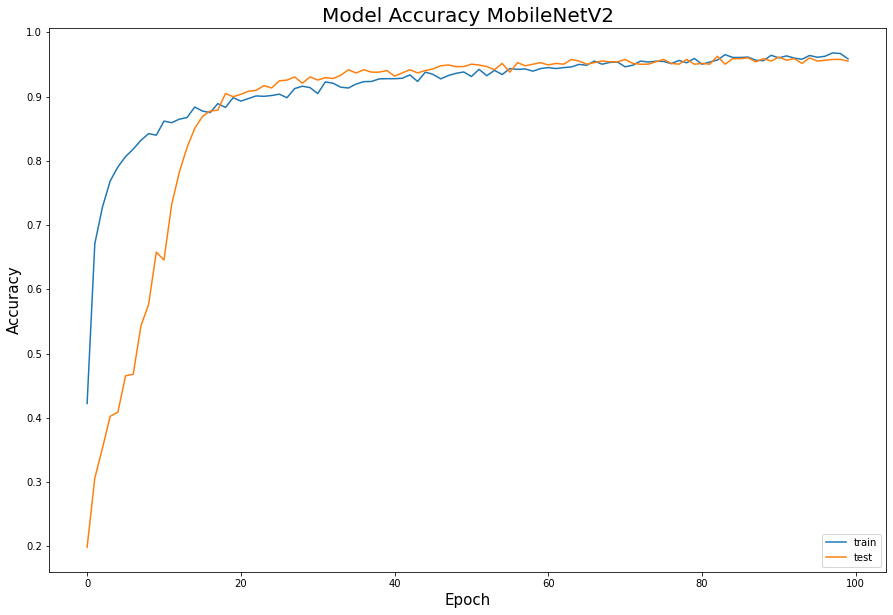

In [ ]:
# plotting the figure for accuracy
plt.figure(figsize=(15,10))
plt.plot(history_MobileNetV2.history['accuracy'])
plt.plot(history_MobileNetV2.history['val_accuracy'])
plt.title('Model Accuracy MobileNetV2',fontsize=20)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train', 'test'], loc='lower right')
plt.savefig("history_MobileNetV2-Accuracy-Sipakmed.png")
plt.show()

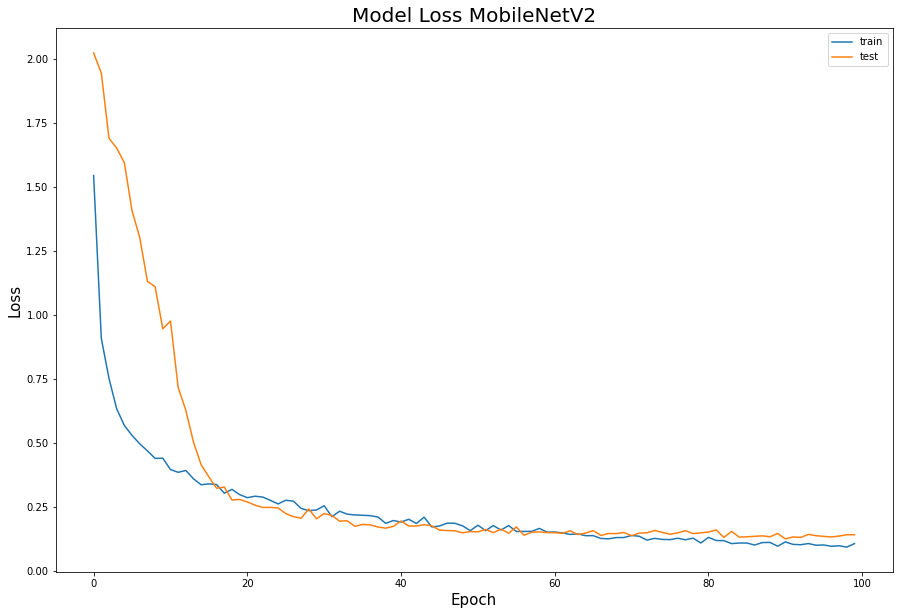

In [ ]:
# plotting the figure for loss
plt.figure(figsize=(15,10))
plt.plot(history_MobileNetV2.history['loss'])
plt.plot(history_MobileNetV2.history['val_loss'])
plt.title('Model Loss MobileNetV2',fontsize=20)
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("MobileNetV2-Sipakmed.png")
plt.show()

In [ ]:
pwd

'/content'

# **InceptionV3_model**

In [ ]:
InceptionV3_model = tf.keras.applications.inception_v3.InceptionV3( input_shape= IMG_SHAPE  , 
                                               include_top = False , 
                                                weights='imagenet')

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
InceptionV3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(InceptionV3_model.output)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100,activation='relu')(x)
x = tf.keras.layers.Dense(5,activation='softmax')(x)

InceptionV3 = Model(inputs=InceptionV3_model.input, outputs=x)

In [ ]:
InceptionV3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
InceptionV3.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, decay=0.0001),
              metrics=['accuracy'])

In [ ]:
history_InceptionV3 = InceptionV3.fit(
      train_generator,
      validation_data= test_generator , 
      epochs= 100,
      )

Epoch 1/100
203/203 [==============================] - 106s 330ms/step - loss: 1.2495 - accuracy: 0.4958 - val_loss: 0.9110 - val_accuracy: 0.6840
Epoch 2/100
203/203 [==============================] - 64s 316ms/step - loss: 0.6938 - accuracy: 0.7459 - val_loss: 0.4876 - val_accuracy: 0.8444
Epoch 3/100
203/203 [==============================] - 62s 307ms/step - loss: 0.5367 - accuracy: 0.8077 - val_loss: 0.3808 - val_accuracy: 0.8778
Epoch 4/100
203/203 [==============================] - 63s 308ms/step - loss: 0.4430 - accuracy: 0.8419 - val_loss: 0.3057 - val_accuracy: 0.9086
Epoch 5/100
203/203 [==============================] - 63s 309ms/step - loss: 0.3998 - accuracy: 0.8571 - val_loss: 0.2719 - val_accuracy: 0.9173
Epoch 6/100
203/203 [==============================] - 63s 308ms/step - loss: 0.3672 - accuracy: 0.8580 - val_loss: 0.2507 - val_accuracy: 0.9235
Epoch 7/100
203/203 [==============================] - 63s 311ms/step - loss: 0.3734 - accuracy: 0.8651 - val_loss: 0.2322 

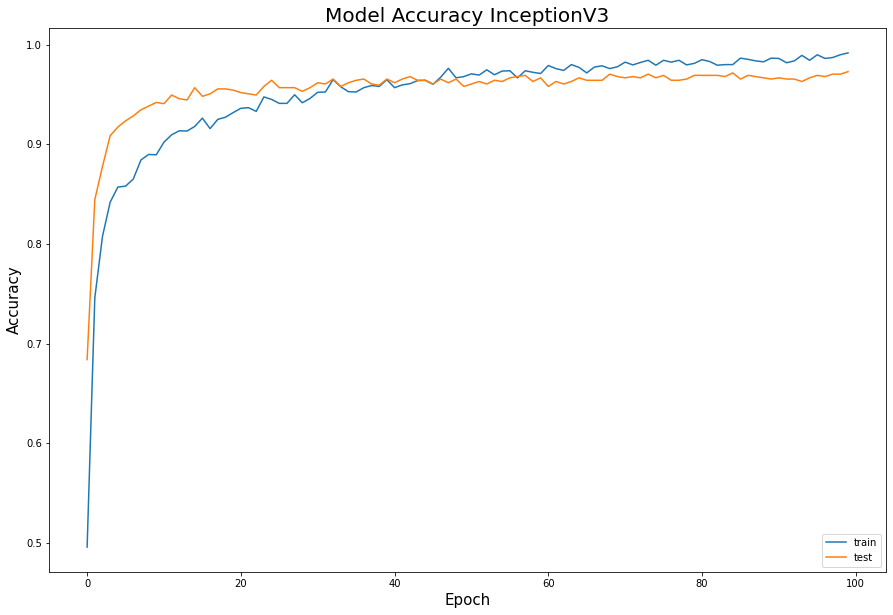

In [ ]:
# plotting the figure for accuracy
plt.figure(figsize=(15,10))
plt.plot(history_InceptionV3.history['accuracy'])
plt.plot(history_InceptionV3.history['val_accuracy'])
plt.title('Model Accuracy InceptionV3',fontsize=20)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train', 'test'], loc='lower right')
plt.savefig("history_InceptionV3-Accuracy-Sipakmed.png")
plt.show()

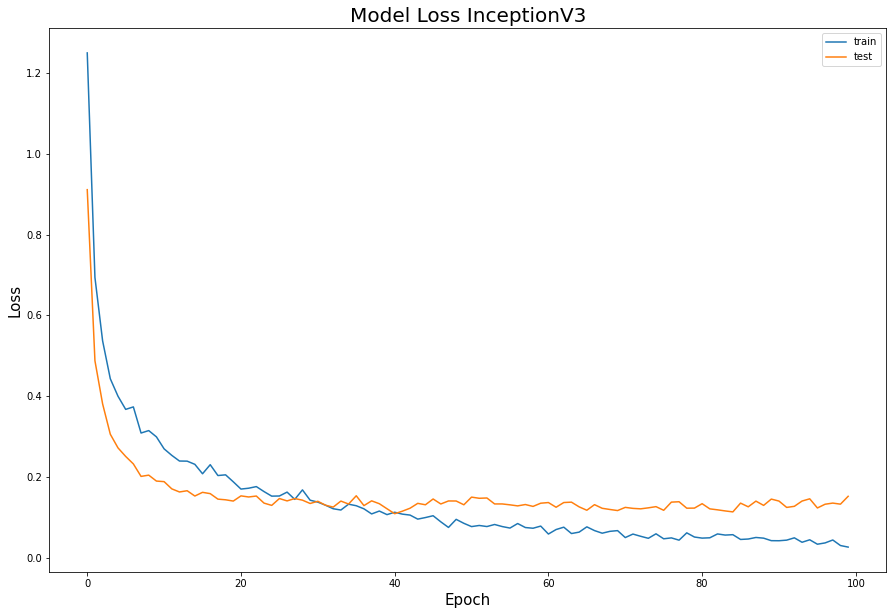

In [ ]:
# plotting the figure for loss
plt.figure(figsize=(15,10))
plt.plot(history_InceptionV3.history['loss'])
plt.plot(history_InceptionV3.history['val_loss'])
plt.title('Model Loss InceptionV3',fontsize=20)
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("InceptionV3-Sipakmed.png")
plt.show()

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/SiPakMed/models

/content/drive/MyDrive/SiPakMed/models


In [ ]:
InceptionV3.save("InceptionV3.h5")

In [ ]:
cd /content/

/content


In [ ]:
InceptionResNetV2_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2( input_shape= IMG_SHAPE  , 
                                               include_top = False , 
                                                weights='imagenet')

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
InceptionResNetV2_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(InceptionResNetV2_model.output)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100,activation='relu')(x)
x = tf.keras.layers.Dense(5,activation='softmax')(x)

InceptionResNetV2 = Model(inputs=InceptionResNetV2_model.input, outputs=x)

In [ ]:
InceptionResNetV2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
InceptionResNetV2.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, decay=0.0001),
              metrics=['accuracy'])

In [ ]:
history_InceptionResNetV2 = InceptionResNetV2.fit(
      train_generator,
      validation_data= test_generator , 
      epochs= 100,
      )

Epoch 1/100
203/203 [==============================] - 140s 455ms/step - loss: 1.2367 - accuracy: 0.5113 - val_loss: 1.1575 - val_accuracy: 0.5864
Epoch 2/100
203/203 [==============================] - 90s 440ms/step - loss: 0.6365 - accuracy: 0.7768 - val_loss: 0.5272 - val_accuracy: 0.8049
Epoch 3/100
203/203 [==============================] - 91s 448ms/step - loss: 0.4552 - accuracy: 0.8391 - val_loss: 0.3261 - val_accuracy: 0.8938
Epoch 4/100
203/203 [==============================] - 92s 450ms/step - loss: 0.3909 - accuracy: 0.8533 - val_loss: 0.2755 - val_accuracy: 0.9111
Epoch 5/100
203/203 [==============================] - 92s 451ms/step - loss: 0.3258 - accuracy: 0.8805 - val_loss: 0.2825 - val_accuracy: 0.9198
Epoch 6/100
203/203 [==============================] - 92s 451ms/step - loss: 0.3221 - accuracy: 0.8848 - val_loss: 0.2567 - val_accuracy: 0.9259
Epoch 7/100
203/203 [==============================] - 92s 451ms/step - loss: 0.3001 - accuracy: 0.8892 - val_loss: 0.2548 

# **Xception**

In [ ]:
Xception_model = tf.keras.applications.xception.Xception( input_shape= IMG_SHAPE  , 
                                               include_top = False , 
                                                weights='imagenet')

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
Xception_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(Xception_model.output)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100,activation='relu')(x)
x = tf.keras.layers.Dense(5,activation='softmax')(x)

Xception = Model(inputs=Xception_model.input, outputs=x)

In [ ]:
Xception.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
Xception.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, decay=0.0001),
              metrics=['accuracy'])

In [ ]:
history_Xception = Xception.fit(
      train_generator,
      validation_data= test_generator , 
      epochs= 100,
      )

Epoch 1/100
203/203 [==============================] - 97s 451ms/step - loss: 1.0980 - accuracy: 0.5847 - val_loss: 0.8153 - val_accuracy: 0.6864
Epoch 2/100
203/203 [==============================] - 88s 431ms/step - loss: 0.4956 - accuracy: 0.8311 - val_loss: 0.3181 - val_accuracy: 0.8938
Epoch 3/100
203/203 [==============================] - 88s 431ms/step - loss: 0.3824 - accuracy: 0.8660 - val_loss: 0.2255 - val_accuracy: 0.9383
Epoch 4/100
203/203 [==============================] - 88s 432ms/step - loss: 0.3251 - accuracy: 0.8787 - val_loss: 0.1877 - val_accuracy: 0.9481
Epoch 5/100
203/203 [==============================] - 88s 430ms/step - loss: 0.2802 - accuracy: 0.8975 - val_loss: 0.1776 - val_accuracy: 0.9481
Epoch 6/100
203/203 [==============================] - 88s 430ms/step - loss: 0.2750 - accuracy: 0.8994 - val_loss: 0.1562 - val_accuracy: 0.9519
Epoch 7/100
203/203 [==============================] - 88s 431ms/step - loss: 0.2265 - accuracy: 0.9203 - val_loss: 0.1709 -

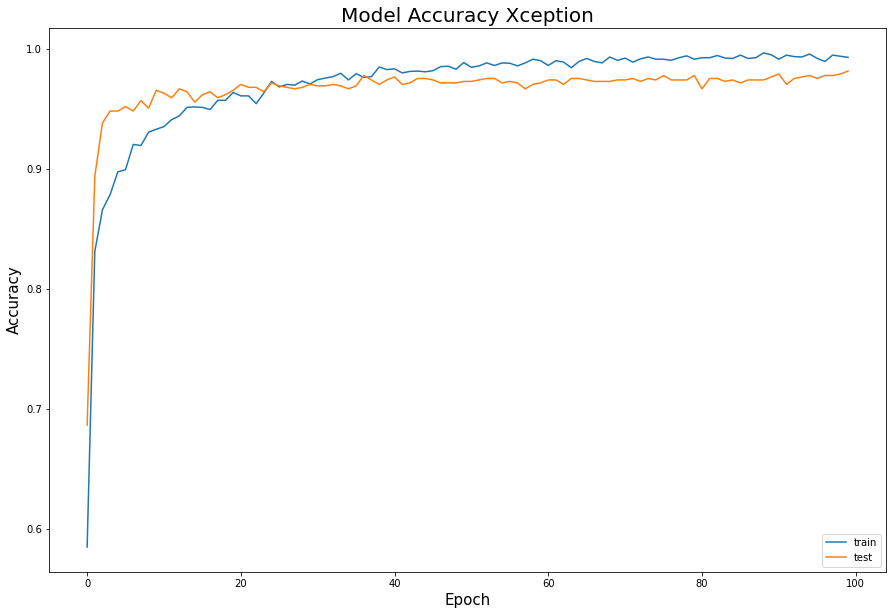

In [ ]:
# plotting the figure for accuracy
plt.figure(figsize=(15,10))
plt.plot(history_Xception.history['accuracy'])
plt.plot(history_Xception.history['val_accuracy'])
plt.title('Model Accuracy Xception',fontsize=20)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train', 'test'], loc='lower right')
plt.savefig("history_Xception-Accuracy-Sipakmed.png")
plt.show()

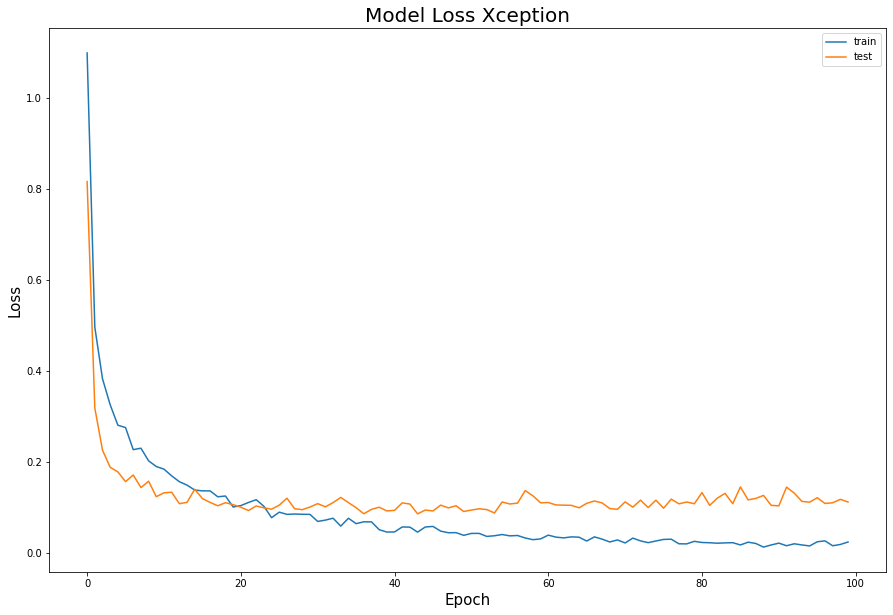

In [ ]:
# plotting the figure for loss
plt.figure(figsize=(15,10))
plt.plot(history_Xception.history['loss'])
plt.plot(history_Xception.history['val_loss'])
plt.title('Model Loss Xception',fontsize=20)
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("Xception-Sipakmed.png")
plt.show()

In [ ]:
cd /content/drive/MyDrive/SiPakMed/models

/content/drive/MyDrive/SiPakMed/models


In [ ]:
Xception.save("Xception.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
save_mobilenet = tf.keras.models.load_model('/content/drive/MyDrive/SiPakMed/models/MobileNetV2.h5')

In [ ]:
save_mobilenet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
# import os
# directory = "/content/SiPakMed/train/Dyskeratotic"
# for filename in os.listdir(directory):
#     print(filename)

# from keras.preprocessing import image
# path = "/content/SiPakMed/train/Dyskeratotic/Dyskeratotic1.jpg"
# img = image.load_img(path, target_size=(256 , 256 ))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# l = []

# images = np.vstack([x])
# images = images/255.0
# classes = save_mobilenet.predict(images, batch_size=16)
# arg = np.argmax(classes[0])
# test = classes[0].tolist()
# test.insert(0, "Dyskeratotic1")
# test.append(arg)
# print(test)

['Dyskeratotic1', 0.9999290704727173, 4.602476565196412e-06, 2.014020950014128e-09, 6.630794086959213e-05, 9.063685801891097e-09, 0]


In [ ]:
save_mobilenet = tf.keras.models.load_model('/content/drive/MyDrive/SiPakMed/models/MobileNetV2.h5')
save_InceptionV3 = tf.keras.models.load_model('/content/drive/MyDrive/SiPakMed/models/InceptionV3.h5')
save_Xception = tf.keras.models.load_model('/content/drive/MyDrive/SiPakMed/models/Xception.h5')


In [ ]:

unique = ["Dyskeratotic" , "Koilocytotic" , "Metaplastic" , "Parabasal" , "SuperficialIntermediate"]

models = {"mobilenet_csv" : save_mobilenet ,"InceptionV3_csv" : save_InceptionV3 ,"Xception_csv" : save_Xception} 
for model_name , model  in models.items() :
  results =  []
  for i in unique:
    directory = "/content/SiPakMed/test/" + i 

    for filename in os.listdir(directory):
      path = directory + "/" + filename 
      
      img = image.load_img(path, target_size=(256 , 256 ))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      images = np.vstack([x])
      images = images/255.0
      classes = model.predict(images, batch_size=16)
      arg = unique[np.argmax(classes[0])]
      result = classes[0].tolist()
      
      result.insert(0,filename)
      result.append(i)
      result.append(arg)


      results.append(result)
  df = pd.DataFrame(results, columns = ["filename"] + unique + ["actual"] + ["prediction"]) 
  df.to_csv("/content/drive/MyDrive/SiPakMed/csv_files/" + model_name )

    

    



In [ ]:
csv_files = ["InceptionV3_csv" , "Xception_csv" , "mobilenet_csv"]
base = "/content/drive/MyDrive/SiPakMed/csv_files/"
for csv_file in csv_files:
  path = base + csv_file
  df = pd.read_csv(path)
  count = 0 
  for name , pred  in zip(df["actual"] , df["prediction"]):
    if(name == pred):
      count += 1 
  print(csv_file , "->  " , (count / len(df["actual"])))    


InceptionV3_csv ->   0.9728395061728395
Xception_csv ->   0.9814814814814815
mobilenet_csv ->   0.9555555555555556


# **save_InceptionV3 ->   0.9728395061728395**
# **save_Xception ->   0.9814814814814815**
# **save_mobilenet ->   0.9555555555555556**